In [64]:
# Load dataset using pandas
import pandas as pd
import numpy as np

df = pd.read_csv("TrainTestData_Promotional Sales.csv")
df = df[df['Trx'] != '10000']

#df = df.drop(['Account'], axis=1)

In [65]:
# Split Test Data and Train Data

test_df = df[df['Trx'] == '????']
train_df = df[df['Trx'] != '????']

In [66]:
# from numpy import argmax
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder

# # integer encode
# label_encoder = LabelEncoder()
# integer_encoded = label_encoder.fit_transform(train_df['Account'])
# print(integer_encoded)
# # binary encode
# onehot_encoder = OneHotEncoder(sparse=True)
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
# onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# print(onehot_encoded.todense())
# encoded_df = pd.DataFrame(onehot_encoded.todense())
# # invert first example
# inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
# print(inverted)

In [67]:
import matplotlib.pyplot as plt
import pylab

# int_columns = ['# Speaker Programs', '# Calls', '# PDE', '# Emails', '# Clicks', '# Samples']
# # x = train_data['# Samples'].tolist()
# # y = y_train.tolist()

# for col in int_columns:
#     plt.scatter(train_df[col], train_df['Trx'])
#     plt.xlabel(col)
#     plt.ylabel('Trx')
#     plt.show()

In [68]:
train_df.shape

(11618, 9)

In [69]:
# Drop Month Column
train_df = train_df.drop(['Month'], axis=1)

test_df = test_df.drop(['Month'], axis=1)

In [70]:
# Convert Trx to integer type

train_df['Trx'] = train_df['Trx'].astype(int)
train_df = train_df[~((train_df['Trx'] >= 7000) & (train_df['# Samples'] < 80))]
#train_df = train_df[train_df['# Samples'] < 400]

In [71]:
# plt.rcParams["figure.figsize"] = [16,9]
# plt.boxplot(train_df['Trx'])
# plt.show()

In [72]:
#train_df['Trx'] = train_df['Trx'].apply(lambda x: np.log2(x + 1))

In [73]:
# Separate Trx
y_train = train_df['Trx']
train_data = train_df.drop(['Trx'], axis=1)

y_test_predict = test_df['Trx']
test_data = test_df.drop(['Trx'], axis=1)

In [74]:
# int_columns = ['# Speaker Programs', '# Calls', '# PDE', '# Emails', '# Clicks', '# Samples']

# train_data[int_columns] = train_data[int_columns].apply(lambda x: np.log2(x + 1))
# test_data[int_columns] = test_data[int_columns].apply(lambda x: np.log2(x + 1))

In [75]:
# import matplotlib.pyplot as plt

# train_data.hist()
# plt.show()

In [76]:
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

In [77]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=3)
# pca.fit(train_data)

# train_data = pca.fit_transform(train_data)
# test_data = pca.fit_transform(test_data)

In [78]:
# # Split train test data from train dataset

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(train_data, y_train, test_size=0.20, random_state=42)

In [79]:
# # Apply Standard Scaling
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# scaler.fit(X_train)
# scaler.transform(X_train)
# scaler.transform(X_test)

In [80]:
# # # Try Linear Regression
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.neural_network import MLPRegressor
# from xgboost import XGBRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor


# # poly = PolynomialFeatures(degree=2)
# # X_ = poly.fit_transform(X_train)
# # X_test_ = poly.fit_transform(X_test)

# clf = LinearRegression()
# #clf = SVR(kernel='rbf')
# #clf = MLPRegressor()
# #clf = XGBRegressor()
# #clf = RandomForestRegressor(random_state=42, n_estimators=50)
# #clf = KNeighborsRegressor(n_neighbors=12)

# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

In [81]:
# from sklearn.metrics import mean_squared_error
# import math

# print math.sqrt(mean_squared_error(y_test, y_pred))

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold

regression = LinearRegression()


crossvalidation = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(regression, train_data, y_train, scoring='neg_mean_squared_error', cv=10, n_jobs=1)
print scores

[-1.90096993e+25 -3.78454322e+06 -4.11707411e+24 -4.07957719e+06
 -3.61012621e+06 -3.69268396e+06 -3.85788461e+06 -3.64388974e+06
 -3.67830640e+06 -3.13392776e+26]


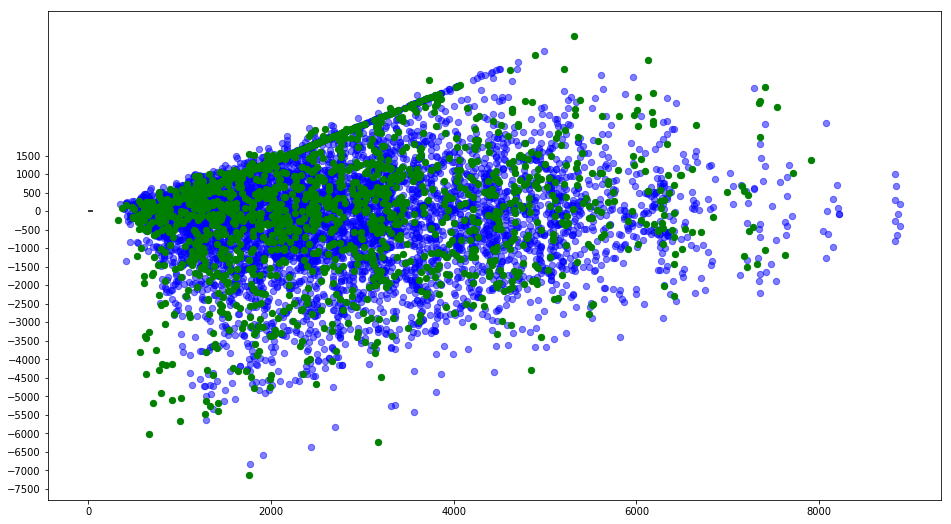

In [246]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(clf.predict(X_train), clf.predict(X_train) - y_train, c='b', s=40, alpha=0.5)
plt.scatter(clf.predict(X_test), clf.predict(X_test) - y_test, c='g', s=40)
plt.yticks(np.arange(-8000, 2000, 500))
plt.hlines(y=0, xmin=0, xmax=50)
plt.show()

In [247]:
#clf.feature_importances_

AttributeError: 'LinearRegression' object has no attribute 'feature_importances_'

In [87]:
predictions = regression.predict(test_data)
#predictions = cross_val_predict(estimator=regression, X=test_data, cv=10)
# predictions = np.asarray(predictions)
# np.savetxt("output.csv", predictions, delimiter=",")

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [138]:
# squarer = lambda t: 2 ** t
# vfunc = np.vectorize(squarer)
# exp_predictions = vfunc(predictions)

In [226]:
def chunks(l, n):
    for i in range(0, len(l), n):
        # Create an index range for l of n items:
        yield l[i:i+n]
    
pred_array = list(chunks(predictions, 6))

In [227]:
np.savetxt("output.csv", np.asarray(pred_array), delimiter=",", header='A,B,C,D,E,F')